In [2]:
import chess
import chess.pgn
import pandas as pd
import numpy as np
import chess.engine
from stockfish import Stockfish

In [3]:
#this method takes as input the board and the last move so to update the board and compute the evaluation
def get_evaluation(board,move):

    stockfish = Stockfish()     #if no parameter passed, takes as input the executable file called stockfish from the same directory, if found
    board.push_san(move)        #insert the move in the board
    stockfish.set_fen_position(board.fen())  #bpard.fen() applies a PGN to FEN conversion
    engine = chess.engine.SimpleEngine.popen_uci("stockfish")
    info = engine.analyse(board, chess.engine.Limit(1))     #gets the infos of the game
    
    #if the position on the board is not a mate the score is in centipawns, then it's divided by 100 to get the actual score
    #Gets the score from White’s point of view
    if chess.engine.PovScore.is_mate(info['score']):
        eval = chess.engine.PovScore.white(info['score'])
    else:
        eval = int(str(chess.engine.PovScore.white(info['score'])))/100

    return board, eval      #returns the board updated and the evaluation of the position

In [4]:
#create_dataFrame takes as input the name of the file pgn containing the game and returns a dataframe
def create_dataFrame(game_name): 

    #opens and reads the pgn file
    pgn = open(game_name) 
    game = chess.pgn.read_game(pgn)
    
                                   
    array = []      #initialize the array that will contain the data
    index_values = [] 
    i=0
    time_white = 0      #to keep track of the time for each player
    time_black = 0      #to keep track of the time for each player
    board = chess.Board()       #initialize the chessboard

    #iterate through the moves
    for node in game.mainline():        
        
        move = str(node.move)       #represents the last move
        board,evaluation = get_evaluation(board,move)       #the get_evaluation method returns the updated board and the evaluation of the current position

        if i%2 == 0:        #if the white is moving we update his time
            index_values.append("white")
            time_white = 600-node.clock()

        else:           #if the black is moving we update his time
            index_values.append("black") 
            time_black = 600-node.clock()

        #evaluation = get_evaluation(board,move)
        #we append an element in the array (a row in the dataframe) with move, time the player used, total time since the game started and evaluation of the position
        array.append([str(node.move),round(600-node.clock(),4),round(time_white+time_black,4),evaluation])   
        i+=1

    column_values = ['move','time','real time','evaluation'] #create the columns names
    array = np.array(array)      #convert our array to a numpy array
    #create a dataframe
    df = pd.DataFrame(data = array, index = index_values, columns = column_values) 
    return df,board


df,board = create_dataFrame("valesepicacchi_vs_dmac5555_2022.05.07 (1).pgn")   
df

,move,time,real time,evaluation
white,e2e4,0.0,0.0,0.24
black,e7e5,2.7,2.7,0.97
white,g1f3,1.7,4.4,0.51
black,d7d6,6.7,8.4,0.78
white,b1c3,4.2,10.9,0.32
black,c8g4,7.8,12.0,1.13
white,f1e2,6.6,14.4,0.31
black,g4f3,9.3,15.9,1.14
white,e2f3,8.1,17.4,0.93
black,a7a5,11.2,19.3,1.48


In [18]:
# Creating a fake heartbeat, 827 measures, one measure per second
heartbeat = []
for x in range(50):
    heartbeat.append(82)
heartbeat.append(83)
heartbeat.append(84)
heartbeat.append(85)
heartbeat.append(86)
heartbeat.append(87)
for x in range(140):
    heartbeat.append(88)
heartbeat.append(89)
heartbeat.append(90)
heartbeat.append(91)
heartbeat.append(92)
heartbeat.append(93)
heartbeat.append(94)
for x in range(100):
    heartbeat.append(95)
heartbeat.append(94)
for x in range(100):
    heartbeat.append(93)
heartbeat.append(92)
heartbeat.append(91)
heartbeat.append(90)
heartbeat.append(89)
heartbeat.append(88)
heartbeat.append(87)
for x in range(90):
    heartbeat.append(86)
heartbeat.append(87)
heartbeat.append(88)
heartbeat.append(89)
heartbeat.append(90)
for x in range(100):
    heartbeat.append(91)
heartbeat.append(92)
heartbeat.append(93)
for x in range(140):
    heartbeat.append(94)
heartbeat.append(95)
heartbeat.append(96)
heartbeat.append(97)
heartbeat.append(98)
heartbeat.append(99)
for x in range(50):
    heartbeat.append(100)
heartbeat.append(101)
for x in range(28):
    heartbeat.append(102)
print(len(heartbeat))

time = [x for x in range(828)]
print(len(time))

828
828


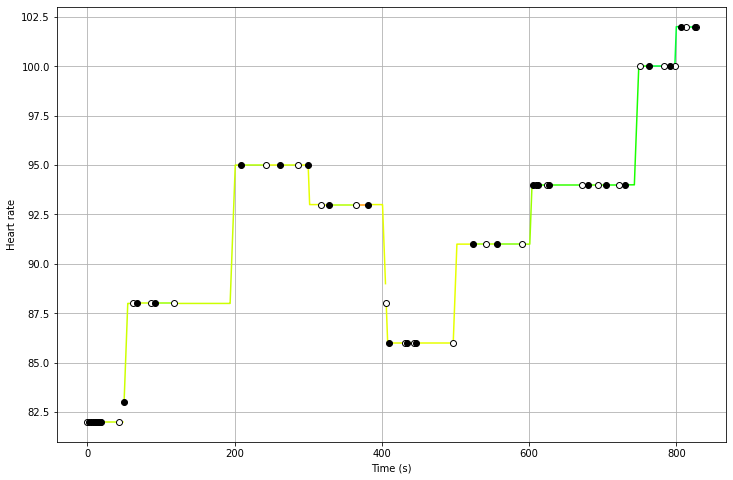

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,8)
hb = np.array(heartbeat)
t = np.array(time)
plt.grid()
    
# drawing the colorful line
for i in range(len(df['evaluation'])-1):
    # checkmate
    if type(df['evaluation'][i]) != float:
        if str(df['evaluation'][i])[1] == '+':
            color = (0,1,0.2)
        else:
            color = (1,0,0.1)
    else:
        # 20-colors grading scale
        if df['evaluation'][i] <= 1 and df['evaluation'][i] > 0:
            color = (0.9, 1, 0)
        if df['evaluation'][i] <= 2 and df['evaluation'][i] > 1:
            color = (0.8, 1, 0)
        if df['evaluation'][i] <= 3 and df['evaluation'][i] > 2:
            color = (0.7, 1, 0)
        if df['evaluation'][i] <= 4 and df['evaluation'][i] > 3:
            color = (0.6, 1, 0)
        if df['evaluation'][i] <= 5 and df['evaluation'][i] > 4:
            color = (0.5, 1, 0)
        if df['evaluation'][i] <= 6 and df['evaluation'][i] > 5:
            color = (0.4, 1, 0)
        if df['evaluation'][i] <= 7 and df['evaluation'][i] > 6:
            color = (0.3, 1, 0)
        if df['evaluation'][i] <= 8 and df['evaluation'][i] > 7:
            color = (0.2, 1, 0)
        if df['evaluation'][i] <= 9 and df['evaluation'][i] > 8:
            color = (0.1, 1, 0)
        if  df['evaluation'][i] >9:
            color = (0, 1, 0)
        if df['evaluation'][i] < 0 and df['evaluation'][i] > -1:
            color = (1, 0.9, 0)
        if df['evaluation'][i] <= -1 and df['evaluation'][i] > -2:
            color = (1, 0.8, 0)
        if df['evaluation'][i] <= -2 and df['evaluation'][i] > -3:
            color = (1, 0.7,  0)
        if df['evaluation'][i] <= -3 and df['evaluation'][i] > -4:
            color = (1, 0.6, 0)
        if df['evaluation'][i] <= -4 and df['evaluation'][i] >-5:
            color = (1, 0.5, 0)
        if df['evaluation'][i] <= -5 and df['evaluation'][i] > -6:
            color = (1, 0.4,0)
        if df['evaluation'][i] <= -6 and df['evaluation'][i] > -7:
            color = (1, 0.3,0)
        if df['evaluation'][i] <= -7 and df['evaluation'][i] > -8:
            color = (1, 0.2, 0)
        if df['evaluation'][i] <= -8 and df['evaluation'][i] > -9:
            color = (1, 0.1, 0)
        if df['evaluation'][i] <= -9:
            color = (1,0, 0)
    plt.plot(t[round(df['real time'][i]):round(df['real time'][i+1])], hb[round(df['real time'][i]):round(df['real time'][i+1])], color=color,)

# plotting the moves
for i in range(0,len(df['real time']), 2):
    plt.plot(df['real time'][i], hb[round(df['real time'][i])], marker="o", markersize=6, markeredgecolor="black", markerfacecolor="white")
for i in range(1,len(df['real time']), 2):
    plt.plot(df['real time'][i], hb[round(df['real time'][i])], marker="o", markersize=6, markeredgecolor="black", markerfacecolor="black")

plt.xlabel("Time (s)")
plt.ylabel("Heart rate")
plt.show()

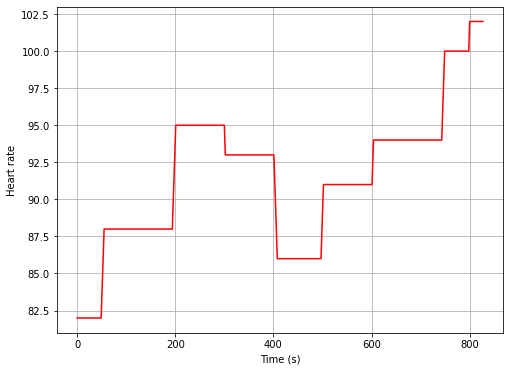

In [20]:
# Heart rate graph
plt.rcParams["figure.figsize"] = (8,6)
hb = np.array(heartbeat)
t = np.array(time)
plt.grid()
plt.plot(t,hb, 'r')

plt.xlabel("Time (s)")
plt.ylabel("Heart rate")
plt.show()

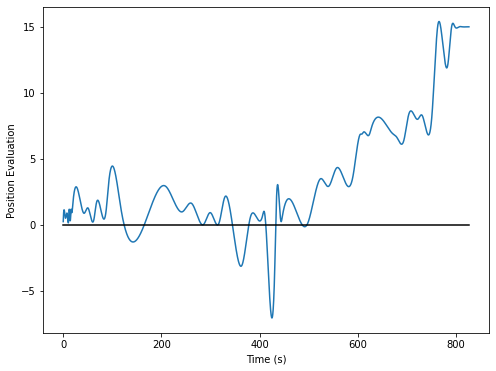

In [21]:
# Position evaluation graph (15 = checkmate)

from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

eval = []
for x in range(len(df['evaluation'])):
    if type(df['evaluation'][x]) == float:
        eval.append(df['evaluation'][x])
    elif str(df['evaluation'][x])[1] =='+':
        # pick a good checkmate value
        eval.append(15.0)
    else:
        eval.append(-15.0)

X_Y_Spline = make_interp_spline(df['real time'], eval)
X_ = np.linspace(df['real time'].min(), df['real time'].max(), 5000)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
#plt.plot(df['real time'], eval)
plt.plot(t, [0]*len(t), 'black')

plt.xlabel("Time (s)")
plt.ylabel("Position Evaluation")
plt.show()

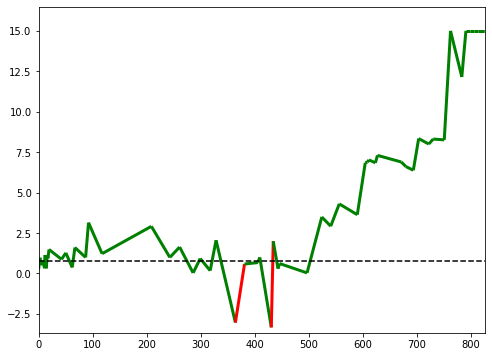

In [22]:
# inutile
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

def threshold_plot(ax, x, y, threshv, color, overcolor):
    cmap = ListedColormap([color, overcolor])
    norm = BoundaryNorm([np.min(y), threshv, np.max(y)], cmap.N)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create the line collection object, setting the colormapping parameters.
    # Have to set the actual values used for colormapping separately.
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(y)

    ax.add_collection(lc)
    ax.set_xlim(np.min(x), np.max(x))
    ax.set_ylim(np.min(y)*1.1, np.max(y)*1.1)
    return lc

fig, ax = plt.subplots()

x = df['real time']
y = eval

lc = threshold_plot(ax, x, y, 0, 'r', 'g')
ax.axhline(.75, color='k', ls='--')
lc.set_linewidth(3)